### Import LIbrary

In [57]:
import pandas as pd # Digunakan untuk membaca file CSV atau Excel
import numpy as np # Digunkanan untuk operasi matematika
import matplotlib.pyplot as plt # Digunakan untuk membuat plot
from sklearn.model_selection import train_test_split # Digunakan untuk membagi data menjadi data training dan data testing
from sklearn.naive_bayes import GaussianNB # Algoritma Naive Bayes
from sklearn.metrics import accuracy_score # Menghitung akurasi
from sklearn.metrics import confusion_matrix # Menghitung confusion matrix
from sklearn.metrics import classification_report # Menghitung classification report
from sklearn.preprocessing import MinMaxScaler # Digunakan untuk menskala agar nilai tidak memiliki rentang yang terlalu jauh
from sklearn.preprocessing import LabelEncoder # Digunakan untuk mengubah data kategorikal menjadi numerik
import seaborn as sb # Digunakan untuk membuat plot
import pickle # Digunakan untuk menyimpan model

### Read Dataset

In [58]:
df_fish = pd.read_csv('fish_data.csv')
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [59]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [60]:
df_fish.empty


False

In [61]:
df_fish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [62]:
pd.unique(df_fish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [63]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

### Label Encoder

In [64]:
le = LabelEncoder()
df_fish['species'] = le.fit_transform(df_fish['species'])
df_fish['species'].value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

### Split Independent dan Dependent Variabel

In [65]:
x = df_fish.drop(['species'], axis=1)
y = df_fish['species']


### Fitur Scaling


In [66]:
scaller = MinMaxScaler()
scaller.fit(x)
x = scaller.fit_transform(x)


### Split Train Test

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### Klasifikasi Naive-Bayes


In [68]:
klasifikasi = GaussianNB()
klasifikasi.fit(x_train, y_train)

GaussianNB()

### Prediksi


In [69]:
y_pred = klasifikasi.predict(x_test)
y_pred

array([6, 4, 3, 4, 5, 8, 6, 5, 8, 7, 5, 3, 2, 4, 7, 3, 2, 1, 8, 3, 7, 1,
       7, 6, 0, 1, 6, 1, 7, 5, 3, 3, 4, 5, 6, 7, 7, 8, 4, 4, 8, 7, 0, 7,
       1, 7, 7, 7, 5, 6, 1, 5, 2, 4, 0, 6, 7, 1, 1, 2, 3, 8, 3, 1, 1, 3,
       1, 3, 3, 1, 2, 4, 7, 8, 6, 5, 7, 5, 4, 0, 7, 6, 6, 7, 2, 1, 7, 6,
       7, 8, 6, 4, 4, 6, 0, 7, 0, 4, 2, 1, 8, 4, 4, 0, 8, 3, 8, 7, 5, 2,
       1, 0, 7, 8, 2, 7, 0, 8, 5, 8, 7, 2, 1, 2, 0, 1, 4, 0, 3, 4, 0, 4,
       7, 3, 1, 8, 8, 4, 7, 7, 8, 0, 0, 8, 5, 5, 7, 7, 7, 6, 3, 7, 0, 1,
       3, 4, 0, 5, 1, 8, 3, 3, 7, 8, 3, 1, 7, 7, 1, 7, 0, 2, 2, 2, 4, 5,
       8, 3, 0, 5, 2, 4, 6, 6, 1, 4, 1, 4, 8, 8, 5, 1, 5, 0, 4, 0, 3, 3,
       5, 3, 4, 0, 6, 4, 0, 4, 8, 2, 6, 8, 8, 1, 4, 8, 1, 5, 6, 8, 4, 0,
       8, 3, 6, 2, 2, 0, 3, 4, 7, 6, 0, 7, 5, 8, 4, 8, 2, 5, 5, 5, 1, 8,
       3, 8, 3, 6, 4, 6, 1, 0, 1, 1, 0, 4, 7, 2, 8, 5, 2, 8, 5, 5, 7, 7,
       4, 4, 7, 1, 1, 7, 1, 1, 1, 4, 8, 2, 6, 8, 8, 2, 0, 0, 1, 8, 5, 4,
       1, 1, 3, 4, 7, 4, 8, 3, 8, 3, 2, 2, 1, 8, 5,

In [70]:
klasifikasi.predict_proba(x_test)

array([[1.82341032e-018, 9.17675358e-089, 7.23971091e-022, ...,
        1.00000000e+000, 3.55020884e-016, 0.00000000e+000],
       [9.19531013e-034, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.99067705e-060, 5.06626710e-012, 7.71040141e-033, ...,
        2.47171929e-229, 3.70039811e-026, 0.00000000e+000],
       ...,
       [1.29174003e-088, 1.00000000e+000, 1.74500873e-067, ...,
        5.81293599e-051, 2.73459840e-058, 0.00000000e+000],
       [4.44542851e-025, 5.74923737e-083, 8.84052313e-047, ...,
        1.22404460e-216, 5.11775543e-035, 0.00000000e+000],
       [1.21240340e-025, 1.12586845e-106, 7.89873869e-065, ...,
        4.09020807e-252, 2.14192774e-051, 0.00000000e+000]])

### Akurasi dan Evaluasi


In [71]:
print("NIlai Akurasi Adalah : ", accuracy_score(y_test, y_pred) * 100)

NIlai Akurasi Adalah :  91.66666666666666


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        96
           2       0.68      0.60      0.64       100
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        84
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        74
           7       0.65      0.73      0.69       103
           8       1.00      1.00      1.00        92

    accuracy                           0.92       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.92      0.92      0.92       816



<Axes: >

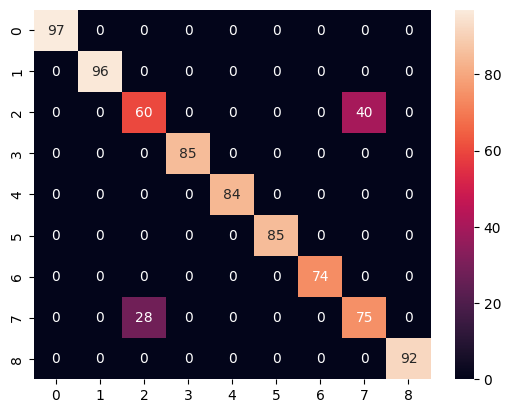

In [72]:
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### Klasifikasi Data Baru

In [73]:
new_fish = [[11.3, 3.1, 0.2]]
klasifikasi.predict(new_fish)
print(klasifikasi.predict(new_fish))

[5]


### Model


In [74]:
pickle.dump(klasifikasi, open('fish_bayes.pkl', 'wb'))